<h1 align="center"><b>Stock Market Technical Analysis</b></h1>
<h2 align="center"><b>Algorithmic Approach</b></h2>
<h2 align="center"><b>for</b></h2>
<h2 align="center"><b>Investing in the Stock Market</b></h2>
<h2 align="center"><b>using Python</b></h2>
<br>
<h1 align="center"><b>Miguel Secillano</b></h1>
<h3 align="center"><b>(2021/2022 Science Fair Project)</b></h3>

<hr>
<br>
<h1 align="center"><b>Notebook 1</b></h1>
<h2 align="center"><b>Single Stock</b></h2>
<h3 align="center"><b>(Initial Experimentation)</b></h3>
<br>
<hr>
<br>

In [76]:
# #%%
# %load_ext autoreload
# %autoreload 2

# Load necessary library modules
import yfinance as yf # Yahoo Finance, where the data comes from
import pandas as pd # Data Analysis
import matplotlib.pyplot as plt # Data Visualization
import matplotlib.ticker as mtick # Data Visualization Formatter

plt.style.use("seaborn")

In [77]:
def list_dictionary_pairs(dict):
    print_stock_symbol_name(dict)
    for key, value in dict.items():
        print(key, ":", value)


def print_stock_symbol_name(dict):
    print(dict["symbol"] + ":", dict["shortName"])
    print("=" * 40)


def get_historial_data(ticker):
    return ticker.history(period="max")

def plot_historical_data(df_history, stock_name):
    # makes plot for data
    plt.figure(figsize=(16,9))
    plt.plot(df_history["Close"], label=f"{stock_name} Close")
    plt.title(f"{stock_name} History", fontsize=25, fontweight="bold")
    plt.xlabel("Time (-current)", fontsize=20)
    plt.ylabel("Closing Price (in U.S. dollars)", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.show()

def calculate_monthly_returns(df_history):
    for i in range(1, len(df_history) - 1):
        month = str(df_history.index[i]).split("-")[1]
        drr = df_history["Daily Return"][i]
        daily_return_rate.append((month, drr))
        monthly_return_rate[month] += drr

def plot_monthly_returns(monthly_return_rate, stock_name):
    # makes monthly bar chart for data
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)
    plt.bar(monthly_return_rate.keys(), height=monthly_return_rate.values())
    plt.title(f"{stock_name} Monthly Historical Returns", fontsize=25, fontweight="bold")
    plt.xlabel("Months", fontsize=20)
    plt.ylabel("Monthly Return Rate", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

In [78]:
stock = "^GSPC" # stock symbol ^GSPC
stock_ticker = yf.Ticker(stock)

In [79]:
stock_info = stock_ticker.info

In [80]:
df_history = get_historial_data(stock_ticker) # gets historical data

In [81]:
print(df_history)

                   Open         High  ...  Dividends  Stock Splits
Date                                  ...                         
1927-12-30    17.660000    17.660000  ...          0             0
1928-01-03    17.760000    17.760000  ...          0             0
1928-01-04    17.719999    17.719999  ...          0             0
1928-01-05    17.549999    17.549999  ...          0             0
1928-01-06    17.660000    17.660000  ...          0             0
...                 ...          ...  ...        ...           ...
2021-09-27  4442.120117  4457.299805  ...          0             0
2021-09-28  4419.540039  4419.540039  ...          0             0
2021-09-29  4362.410156  4385.569824  ...          0             0
2021-09-30  4370.669922  4382.549805  ...          0             0
2021-10-01  4317.160156  4375.189941  ...          0             0

[23551 rows x 7 columns]


In [82]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23551 entries, 1927-12-30 to 2021-10-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          23551 non-null  float64
 1   High          23551 non-null  float64
 2   Low           23551 non-null  float64
 3   Close         23551 non-null  float64
 4   Volume        23551 non-null  int64  
 5   Dividends     23551 non-null  int64  
 6   Stock Splits  23551 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.4 MB


In [83]:
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [84]:
# deletes the Dividends and Stock Splits columns from data; we don't need them
df_history.drop("Dividends", axis=1, inplace=True)
df_history.drop("Stock Splits", axis=1, inplace=True)
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [85]:
daily_return = df_history["Close"].pct_change(1)

In [86]:
daily_return[1:]

Date
1928-01-03    0.005663
1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-06    0.006268
1928-01-09   -0.009060
                ...   
2021-09-27   -0.002776
2021-09-28   -0.020364
2021-09-29    0.001569
2021-09-30   -0.011910
2021-10-01    0.011491
Name: Close, Length: 23550, dtype: float64

In [87]:
df_history["Daily Return"] = daily_return

In [88]:
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return'], dtype='object')

In [89]:
df_history

,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.006268
...,...,...,...,...,...,...
2021-09-27,4442.120117,4457.299805,4436.189941,4443.109863,3032870000,-0.002776
2021-09-28,4419.540039,4419.540039,4346.330078,4352.629883,3495970000,-0.020364
2021-09-29,4362.410156,4385.569824,4355.080078,4359.459961,2753800000,0.001569


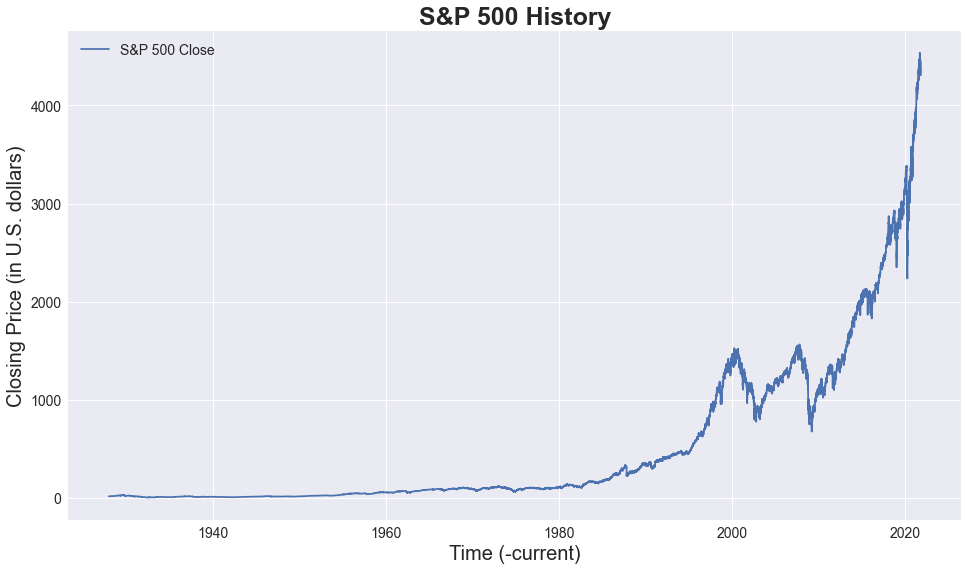

In [90]:
plot_historical_data(df_history, "S&P 500")

In [91]:
daily_return_rate = []
monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
calculate_monthly_returns(df_history)
monthly_return_rate

{'01': 1.1401213977701072,
 '02': -0.06886602780141293,
 '03': 0.45518719239995975,
 '04': 1.3217151761502346,
 '05': -0.07730973962063203,
 '06': 0.7349681106642892,
 '07': 1.4648312601589217,
 '08': 0.6533595640734299,
 '09': -1.0147971860101614,
 '10': 0.486550017398222,
 '11': 0.8192954241753544,
 '12': 1.2724005008379928}

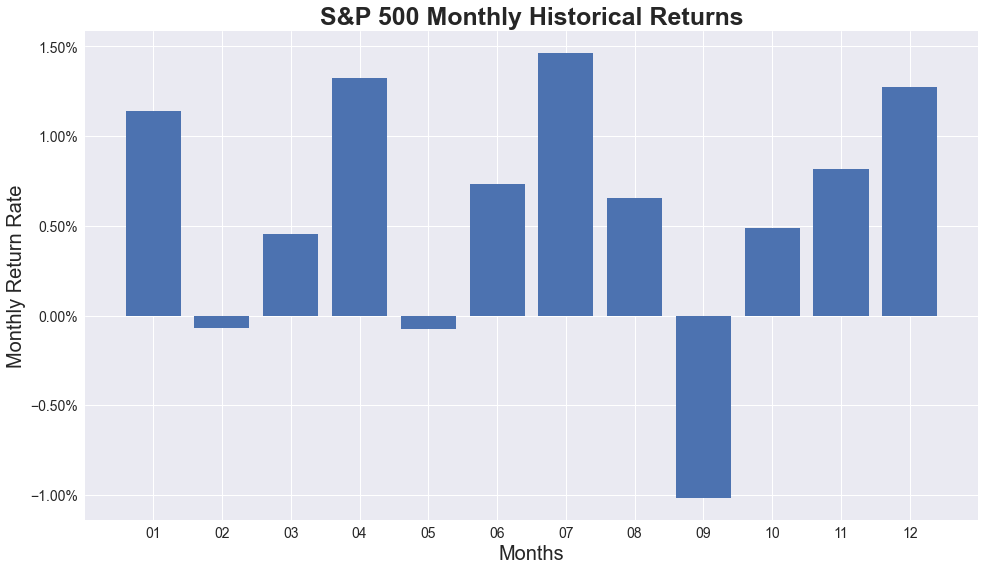

In [92]:
plot_monthly_returns(monthly_return_rate, "S&P 500")

In [93]:
from math import pi
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [94]:
stock_symbol = "^GSPC"
stock_ticker = yf.Ticker(stock_symbol)
stock_short_name = stock_ticker.info["shortName"]
# data = yf.download(stock_symbol)
data = yf.download(stock_symbol, start="2020-01-01", end="2021-10-02")

[*********************100%***********************]  1 of 1 completed


In [95]:
data.reset_index(inplace=True)
print(data.columns)
print()
print(data)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

          Date         Open         High  ...        Close    Adj Close      Volume
0   2020-01-02  3244.669922  3258.139893  ...  3257.850098  3257.850098  3458250000
1   2020-01-03  3226.360107  3246.149902  ...  3234.850098  3234.850098  3461290000
2   2020-01-06  3217.550049  3246.840088  ...  3246.280029  3246.280029  3674070000
3   2020-01-07  3241.860107  3244.909912  ...  3237.179932  3237.179932  3420380000
4   2020-01-08  3238.590088  3267.070068  ...  3253.050049  3253.050049  3720890000
..         ...          ...          ...  ...          ...          ...         ...
437 2021-09-27  4442.120117  4457.299805  ...  4443.109863  4443.109863  3032870000
438 2021-09-28  4419.540039  4419.540039  ...  4352.629883  4352.629883  3495970000
439 2021-09-29  4362.410156  4385.569824  ...  4359.459961  4359.459961  2753800000
440 2021-09-30  4370.669922  4382.549805  ...  4307.540039  4307.540039 

In [96]:
inc = data["Close"] > data["Open"]
dec = data["Open"] > data["Close"]
w = 12 * 60 * 60 * 1000
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

In [97]:
p = figure(
    x_axis_type = "datetime",
    plot_width = 1000,
    tools = TOOLS,
    title = stock_short_name + " - Candlestick Chart 2020-present"
)

In [98]:
p.segment(data["Date"], data["High"], data["Date"], data["Low"], color="black")

GlyphRenderer(id='1294', ...)

In [102]:
p.vbar(
    data["Date"][inc],
    w,
    data["Open"][inc],
    data["Close"][inc],
    fill_color="green",
    line_color="green"
)
p.vbar(
    data["Date"][dec],
    w,
    data["Open"][dec],
    data["Close"][dec],
    fill_color="red",
    line_color="red"
)

GlyphRenderer(id='1926', ...)

In [103]:
show(p)